In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df= pd.read_csv('Advertising.csv',index_col=[0])

In [14]:
df.shape

(200, 4)

In [15]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,24.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [17]:
df.duplicated().sum()

0

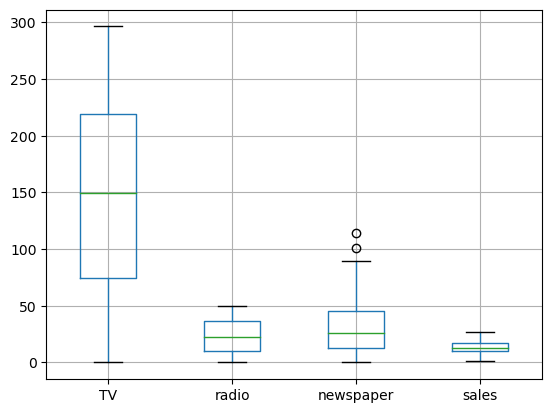

In [18]:
df.boxplot()
plt.show()

In [19]:
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(include=['float','int']).columns:
    outlier_capping(df,col)

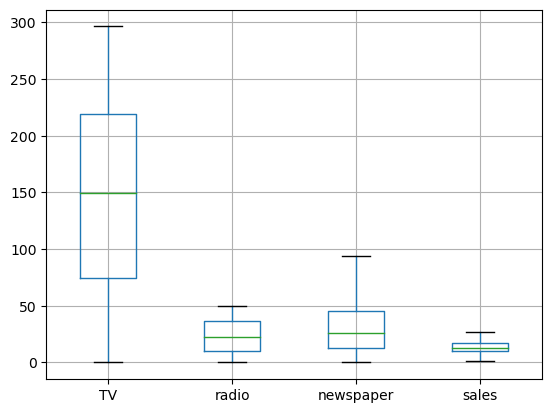

In [20]:
df.boxplot()
plt.show()

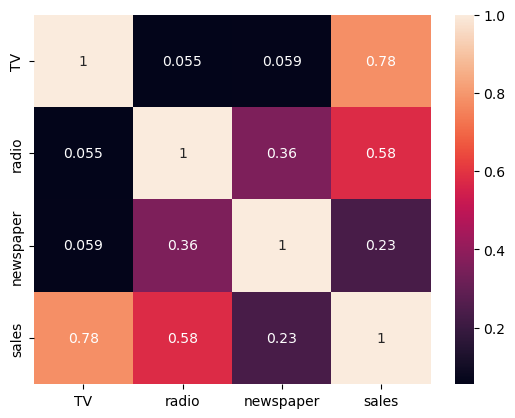

In [25]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()

In [27]:
df[['TV','radio','newspaper']]=std_sca.fit_transform(df[['TV','radio','newspaper']])

In [28]:
df.head()

,TV,radio,newspaper,sales
1,0.969852,0.981522,1.823979,24.1
2,-1.197376,1.082808,0.690583,10.4
3,-1.516155,1.528463,1.828682,9.3
4,0.052050,1.217855,1.320770,18.5
5,0.394182,-0.841614,1.316067,12.9


In [29]:
import statsmodels.formula.api as sfa

In [30]:
## simple_linear
model=sfa.ols(formula='sales~TV',data=df).fit()

In [31]:
model

In [32]:
model.params

Intercept    14.032500
TV            4.080705
dtype: float64

In [33]:
model.rsquared

0.6107027565291872

In [34]:
model.rsquared_adj

0.6087366088348902

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     310.6
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.98e-42
Time:                        12:30:16   Log-Likelihood:                -520.01
No. Observations:                 200   AIC:                             1044.
Df Residuals:                     198   BIC:                             1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0325      0.232     60.605      0.000      13.576      14.489
TV             4.0807      0.232     17.624      0.000       3.624       4.537
==============================================================================
Omnibus:                        0.474   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.616
Skew:                          -0.079   Prob(JB):                        0.735
Kurtosis:                       2.779   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model1= sfa.ols(formula='sales~TV+radio+newspaper',data=df).fit()

In [44]:
model1.params

Intercept    2.905857
TV           0.045865
radio        0.188778
newspaper   -0.000301
dtype: float64

In [50]:
y_pred=model1.predict(df[['TV','radio','newspaper']])

In [52]:
model1.rsquared

0.8960236687593558

In [53]:
model1.rsquared_adj

0.8944321943015908

In [54]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     563.0
Date:                Sun, 04 May 2025   Prob (F-statistic):           4.85e-96
Time:                        13:00:04   Log-Likelihood:                -388.00
No. Observations:                 200   AIC:                             784.0
Df Residuals:                     196   BIC:                             797.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9059      0.315      9.232      0.000       2.285       3.527
TV             0.0459      0.001     32.583      0.000       0.043       0.049
radio          0.1888      0.009     21.724      0.000       0.172       0.206
newspaper     -0.0003      0.006     -0.051      0.960      -0.012       0.011
==============================================================================
Omnibus:                       56.871   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.980
Skew:                          -1.260   Prob(JB):                     1.09e-30
Kurtosis:                       6.195   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""